In [1]:
import tensorflow as tf
import src.model
import numpy as np

ModuleNotFoundError: No module named 'restrictedSoftmax'

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*10)])
#   except RuntimeError as e:
#     # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
#     print(e)

In [3]:
tf.random.set_seed=(0)

In [4]:
img_size = [100, 100]

In [5]:
model = src.model.get_convnext_model(input_shape = (100, 100, 3))
# model = src.model.get_CNN(img_size)

In [6]:
print(model.summary())

Model: "convnext_small_1k"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem (Sequential)              (None, 25, 25, 96)   4896        ['input_1[0][0]']                
                                                                                                  
 convnext_stage_0 (Sequential)  (None, 25, 25, 96)   237888      ['stem[0][0]']                   
                                                                                                  
 downsampling_block_0 (Sequenti  (None, 12, 12, 192)  74112      ['convnext_stage_

In [7]:
# model.save('./models/clients/convNext')
# model.save('models/clients/CNN')

In [8]:
train_ds  = tf.keras.utils.image_dataset_from_directory(
    'data/clients/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=img_size,
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset= 'training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
val_ds  = tf.keras.utils.image_dataset_from_directory(
    'data/clients/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=img_size,
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset= 'validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 50000 files belonging to 10 classes.
Using 40000 files for training.
Found 50000 files belonging to 10 classes.
Using 10000 files for validation.


In [9]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y : (normalization_layer(x) , tf.one_hot(y, 100)))
normalized_val_ds = val_ds.map(lambda x, y : (normalization_layer(x) , tf.one_hot(y, 100)))


In [10]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [11]:
history = model.fit(
  normalized_train_ds,
  # batch_size = 32,
  validation_data=normalized_val_ds,
  epochs=10
)

Epoch 1/10
1250/1250 [==============================] - 271s 201ms/step - loss: 2.0614 - acc: 0.2442 - val_loss: 1.6882 - val_acc: 0.3776
Epoch 2/10
1250/1250 [==============================] - 249s 199ms/step - loss: 1.5905 - acc: 0.4144 - val_loss: 1.4277 - val_acc: 0.4770
Epoch 3/10
1250/1250 [==============================] - 247s 197ms/step - loss: 1.3885 - acc: 0.4953 - val_loss: 1.3195 - val_acc: 0.5216
Epoch 4/10
1250/1250 [==============================] - 248s 198ms/step - loss: 1.2144 - acc: 0.5642 - val_loss: 1.1487 - val_acc: 0.5913
Epoch 5/10
1250/1250 [==============================] - 247s 197ms/step - loss: 1.0554 - acc: 0.6277 - val_loss: 1.0732 - val_acc: 0.6232
Epoch 6/10
1250/1250 [==============================] - 244s 195ms/step - loss: 0.9031 - acc: 0.6823 - val_loss: 1.0638 - val_acc: 0.6426
Epoch 7/10
1250/1250 [==============================] - 247s 197ms/step - loss: 0.7579 - acc: 0.7341 - val_loss: 1.0553 - val_acc: 0.6620
Epoch 8/10
1250/1250 [============

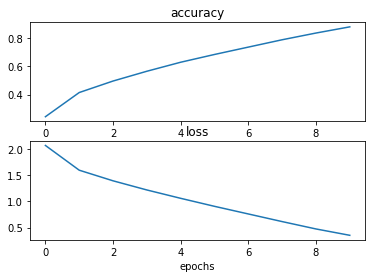

In [20]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.title('accuracy')
plt.xlabel('epochs')
plt.plot(history.history['acc'])
plt.subplot(2, 1, 2)
plt.title('loss')
plt.xlabel('epochs')
plt.plot(history.history['loss'])
plt.show()